In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../DATA/mushrooms.csv")

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


<Axes: xlabel='class', ylabel='count'>

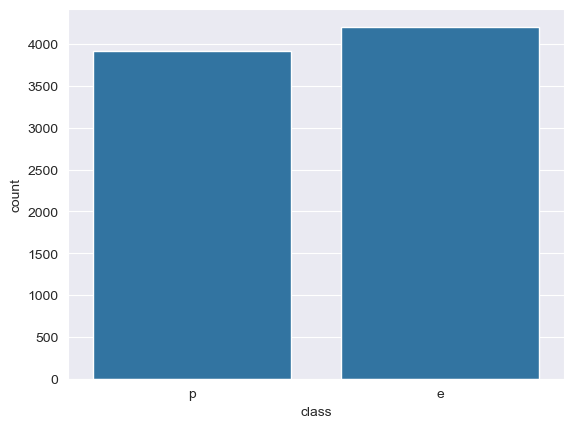

In [4]:
sns.countplot(data=df, x='class')

In [5]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


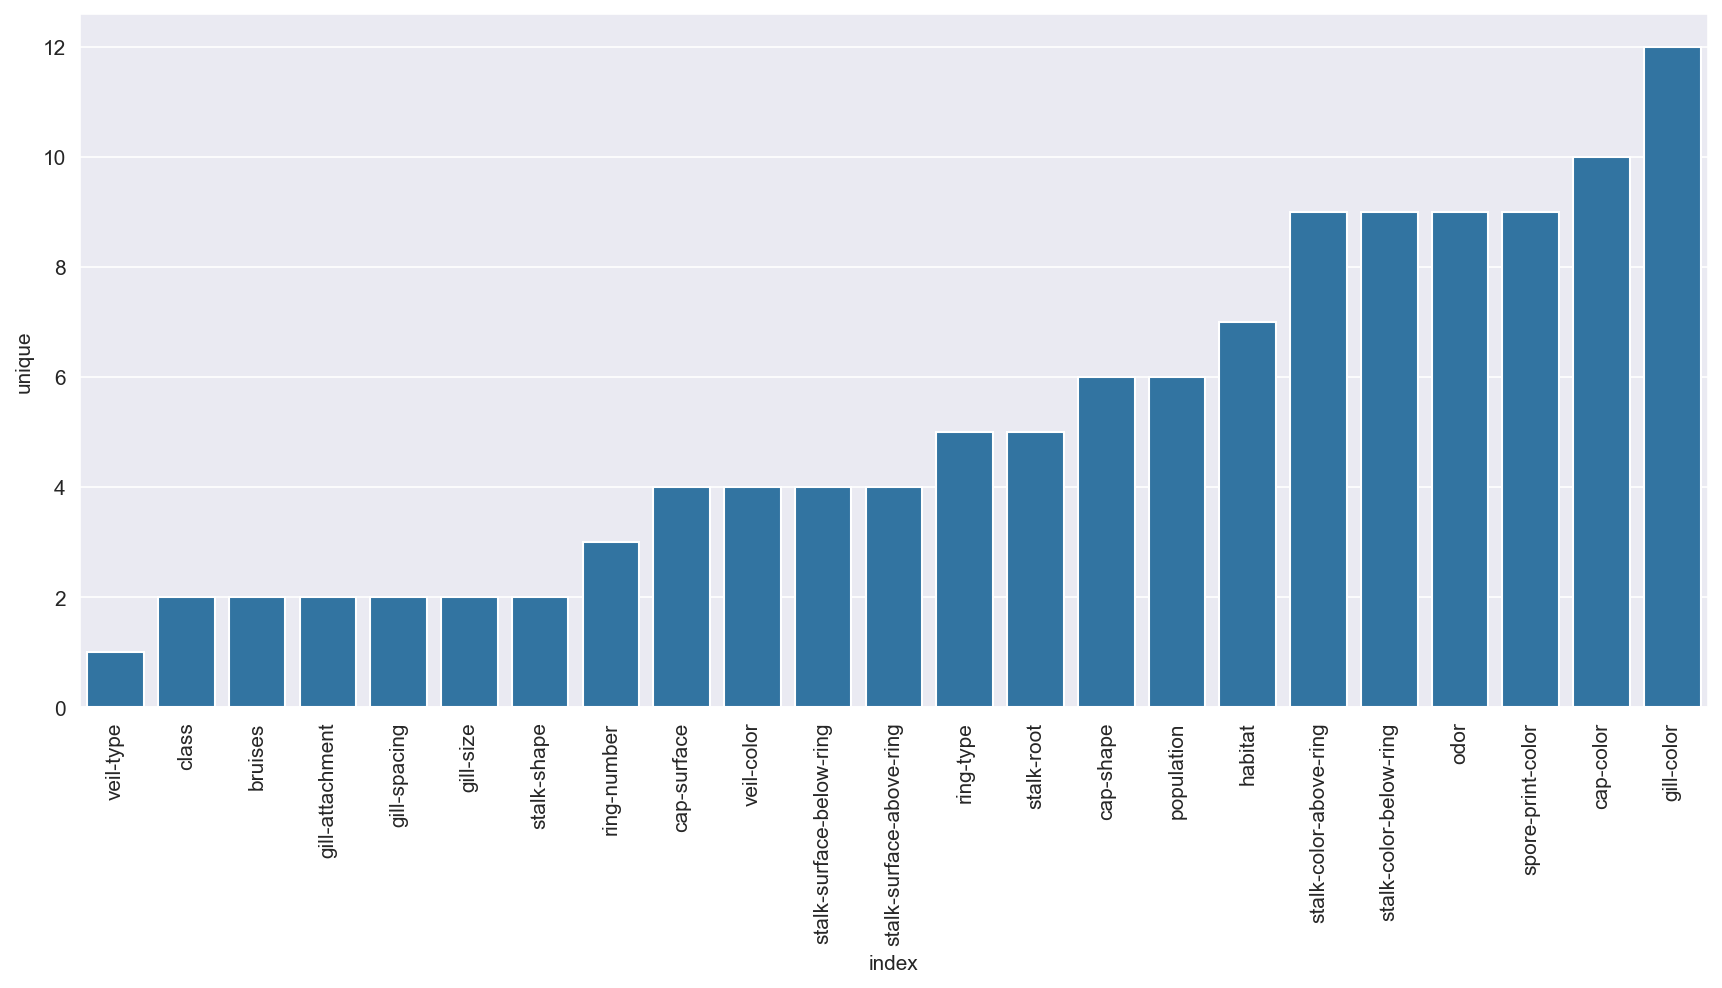

In [6]:
plt.figure(figsize=(14, 6), dpi=150)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'), x='index', y='unique')
plt.xticks(rotation=90);

In [7]:
X = df.drop('class', axis=1)

In [8]:
X = pd.get_dummies(X, drop_first=True)

In [9]:
y = df['class']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
model = AdaBoostClassifier(n_estimators=1, algorithm='SAMME')

In [14]:
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=1)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [16]:
predctions = model.predict(X_test)

In [17]:
predctions

array(['p', 'e', 'p', ..., 'e', 'e', 'p'], dtype=object)

In [18]:
accuracy_score(y_test, predctions)

0.8769483182936834

In [19]:
confusion_matrix = confusion_matrix(y_test, predctions)
confusion_matrix

array([[1015,  259],
       [  41, 1123]], dtype=int64)

In [20]:
print(classification_report(y_test, predctions))

              precision    recall  f1-score   support

           e       0.96      0.80      0.87      1274
           p       0.81      0.96      0.88      1164

    accuracy                           0.88      2438
   macro avg       0.89      0.88      0.88      2438
weighted avg       0.89      0.88      0.88      2438



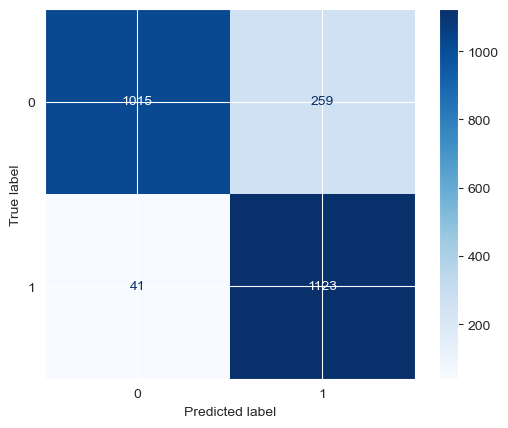

In [21]:
ConfusionMatrixDisplay(confusion_matrix).plot(cmap='Blues')

In [22]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
model.feature_importances_.argmax()

22

In [25]:
X.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

In [26]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

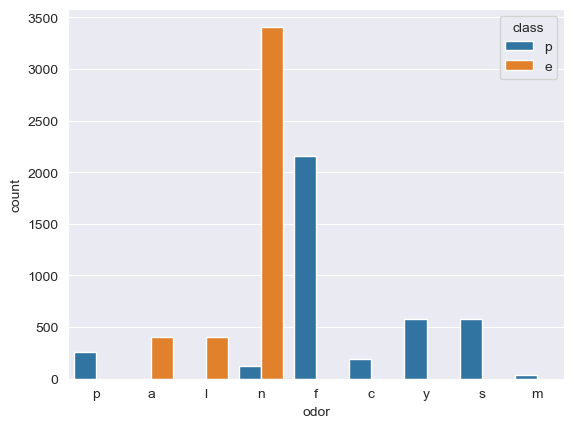

In [27]:
sns.countplot(data=df, x='odor', hue='class')

In [28]:
len(X.columns)

95

In [30]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n, algorithm='SAMME')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, preds))

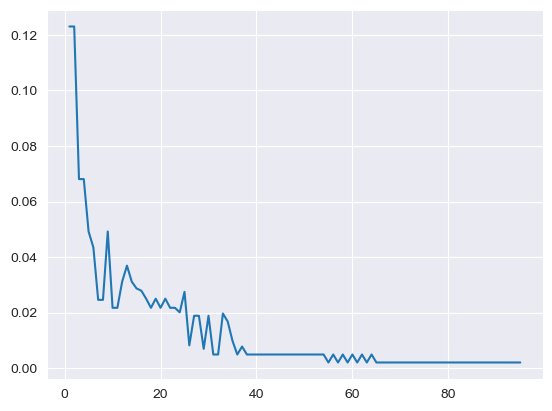

In [31]:
plt.plot(range(1, 96), error_rates)

In [32]:
model

AdaBoostClassifier(algorithm='SAMME', n_estimators=95)

In [35]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])

In [36]:
feats

,Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [37]:
imp_feats = feats[feats['Importance'] > 0]

In [38]:
imp_feats

,Importance
odor_c,0.085104
odor_f,0.168153
odor_l,0.039997
odor_n,0.081410
odor_p,0.084119
odor_s,0.012397
odor_y,0.012365
gill-spacing_w,0.020504
gill-size_n,0.057052
stalk-shape_t,0.016592


In [39]:
imp_feats = imp_feats.sort_values('Importance')

In [40]:
imp_feats

,Importance
odor_y,0.012365
odor_s,0.012397
spore-print-color_k,0.015784
population_n,0.016584
stalk-shape_t,0.016592
spore-print-color_n,0.018768
gill-spacing_w,0.020504
stalk-color-below-ring_y,0.022180
population_v,0.030373
spore-print-color_u,0.030947


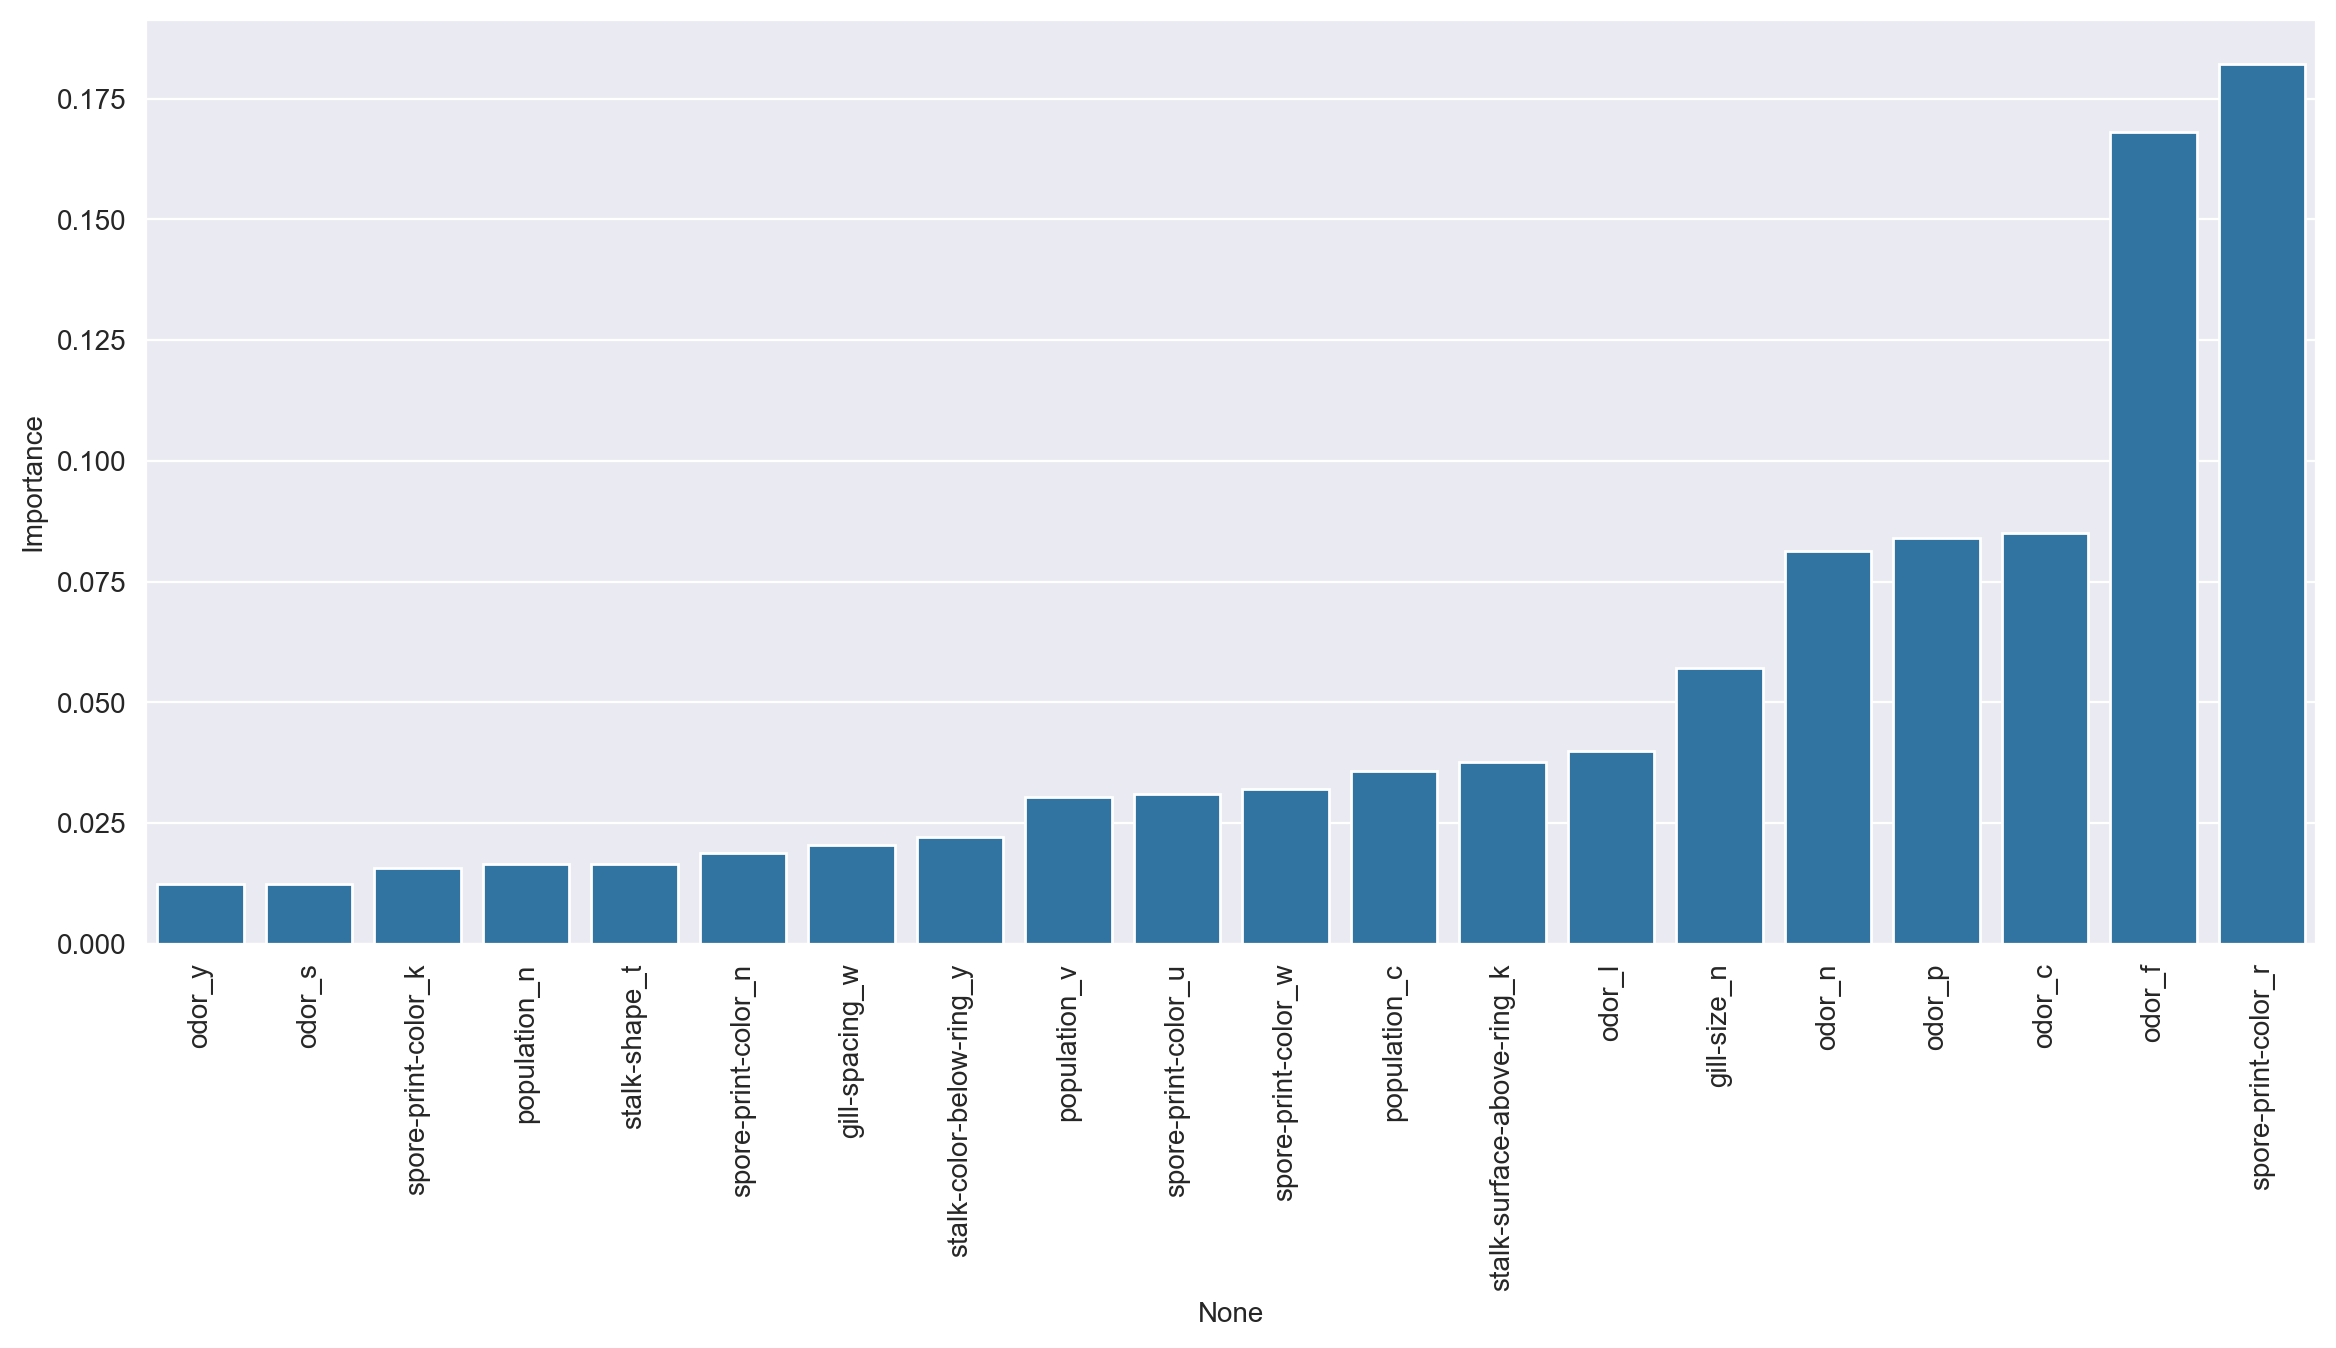

In [42]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

<Axes: xlabel='habitat', ylabel='count'>

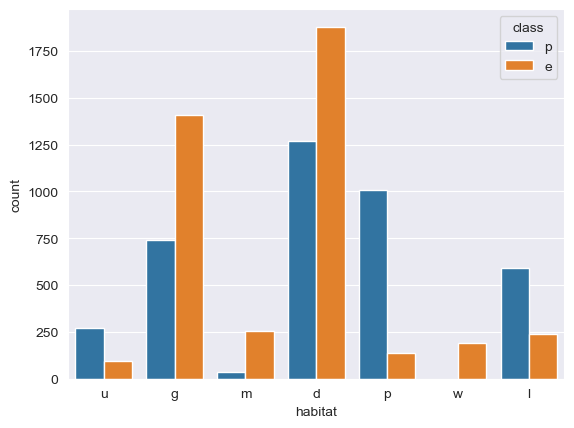

In [44]:
sns.countplot(data=df,x='habitat',hue='class')